In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import os
import datetime

# For how to import the scripts folder so that it can be used:
# https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.append('../scripts')

import project_functions
# relative import did not work for some reason
#from .. import project_functions

pathToData = '../../data/raw/ks-projects-201801.csv'

dfj = project_functions.load_and_process(pathToData, 'Jacob')
dfr = project_functions.load_and_process(pathToData, 'Rylan')

## Task 3 | Exploratory Data Analysis | Jacob

The info function gives information on all the columns and there associated types. The result shows that the 'load_and_process' function of the data pipeline has worked correctly as the new **'stateInt'** (int64), **'duration'** (timedelta64)\[ns\], and **'durationInt'** (int 64) columns have been created with the correct types.

In [2]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Name              1000 non-null   object         
 1   category          1000 non-null   object         
 2   main_category     1000 non-null   object         
 3   currency          1000 non-null   object         
 4   deadline          1000 non-null   object         
 5   launched          1000 non-null   object         
 6   pledged           1000 non-null   float64        
 7   state             1000 non-null   object         
 8   backers           1000 non-null   int64          
 9   country           1000 non-null   object         
 10  usd_pledged_real  1000 non-null   float64        
 11  usd_goal_real     1000 non-null   float64        
 12  stateInt          1000 non-null   int64          
 13  duration          1000 non-null   timedelta64[ns]
 14  percentFu

This function shows the number of unique values for each column.

In [3]:
print(dfj.nunique(axis=0))

Name                1000
category             125
main_category         15
currency              12
deadline             789
launched            1000
pledged              689
state                  6
backers              238
country               20
usd_pledged_real     745
usd_goal_real        369
stateInt               6
duration            1000
percentFunded        807
durationInt           63
dtype: int64


In [4]:
print(dfj.describe())

            pledged       backers  usd_pledged_real  usd_goal_real  \
count  1.000000e+03   1000.000000      1.000000e+03   1.000000e+03   
mean   1.663106e+04    123.652000      1.486029e+04   2.576125e+04   
std    1.541350e+05    570.856078      1.469639e+05   1.182442e+05   
min    0.000000e+00      0.000000      0.000000e+00   9.100000e-01   
25%    4.000000e+01      2.000000      4.000000e+01   2.000000e+03   
50%    8.555000e+02     16.000000      8.529250e+02   5.000000e+03   
75%    4.799500e+03     62.000000      4.641663e+03   1.500000e+04   
max    4.236618e+06  12758.000000      4.236618e+06   2.673502e+06   

          stateInt                    duration  percentFunded  durationInt  
count  1000.000000                        1000    1000.000000  1000.000000  
mean      0.646000     33 days 04:28:57.071000     192.755121    32.757000  
std       0.807053  11 days 22:37:00.171401254    2013.546168    11.934672  
min       0.000000             0 days 04:56:21       0.000000

This plot shows the distribution of Kickstarter projects based on the duration of the project. Interestingly, this shows that 1 month long projects are the majority of projects composing about 47% of all projects. 2 month long and 1.5 month long projects are the next most common.

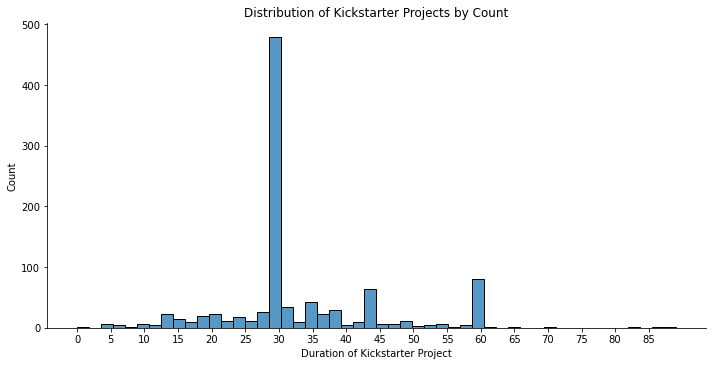

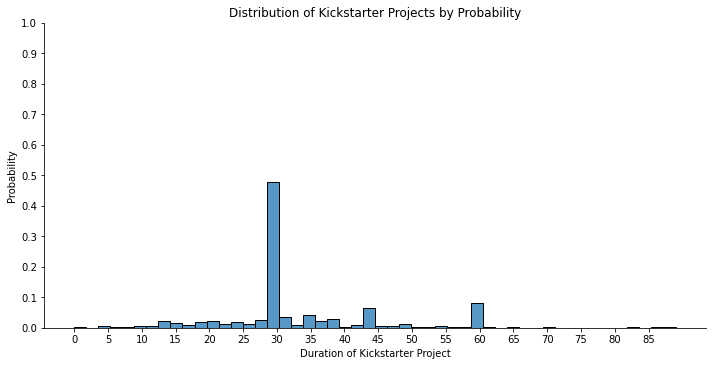

In [5]:

axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50).set(title='Distribution of Kickstarter Projects by Count')
#axes = sns.displot(data=df, x='durationInt', aspect=2.0)
axes.set_axis_labels('Duration of Kickstarter Project', 'Count')
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
axes.set(xticks=np.arange(0, 90, 5))


# Learned how to use 'stat' parameter to get bins by probability and not count from user miro from here:
# https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count
axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50, stat='probability').set(title='Distribution of Kickstarter Projects by Probability')
axes.set_axis_labels('Duration of Kickstarter Project', 'Probability')
axes.set(xticks=np.arange(0, 90, 5), yticks=np.arange(0,1.1,0.1))

Here is another interesting plot which shows the distribution of the different possible states of a project. Since my research question is focused on how the duration of a project affects it success, I am going to focus on projects which have the states of 'failed/canceled' or 'successful'. The other states do not provide information about the success so they will be filter out.

<AxesSubplot:xlabel='state', ylabel='count'>

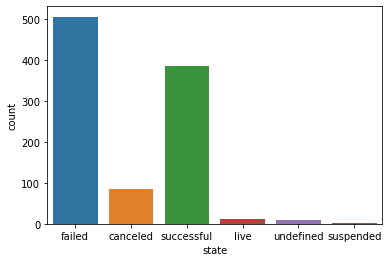

In [6]:
sns.countplot(x='state', data=dfj)

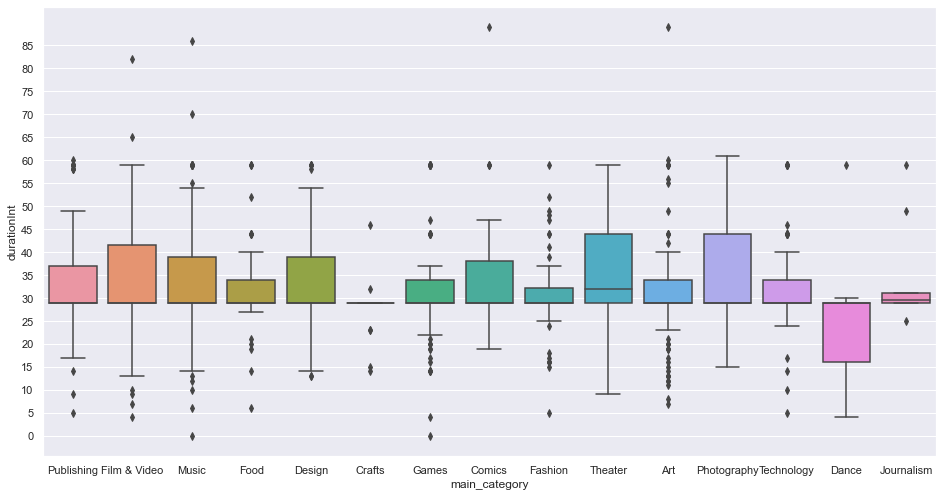

In [7]:
# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})
box1 = sns.boxplot(data=dfj[dfj['durationInt'].between(0, 90)], y='durationInt', x='main_category')
box1.set(yticks=np.arange(0,90,5))
print()

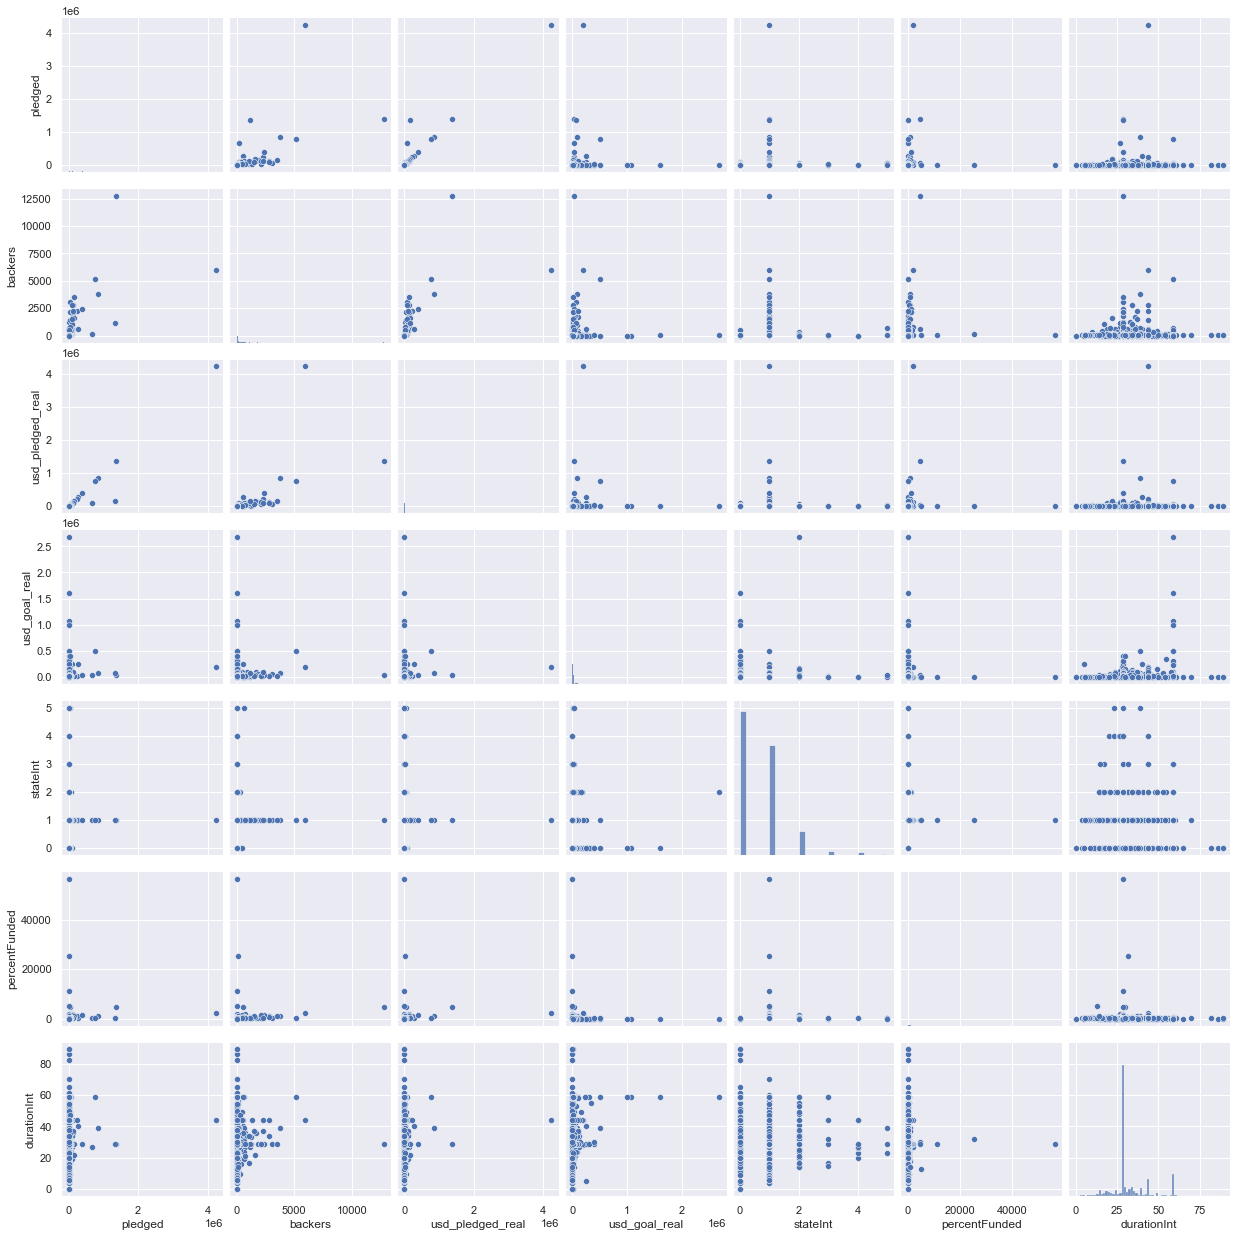

In [19]:
sns.pairplot(dfj)

## Task 3 | Exploratory Data Analysis | Rylan

In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import sys

sys.path.append('../scripts')

import project_functions

dfr = project_functions.load_and_process('../../data/raw/ks-projects-201801.csv', "Rylan")

In [11]:
dfr.shape

(161942, 6)

In [12]:
dfr.head()

,name,category,state,pledged,goal,plus_minus
4,Community Film Project: The Art of Neighborhoo...,Film & Video,canceled,1283.00,19500.0,-1283.00
5,Monarch Espresso Bar,Food,successful,52375.00,50000.0,52375.00
6,Support Solar Roasted Coffee & Green Energy! ...,Food,successful,1205.00,1000.0,1205.00
8,SPIN - Premium Retractable In-Ear Headphones w...,Design,canceled,8233.00,125000.0,-8233.00
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,canceled,6240.57,65000.0,-6240.57


In [13]:
dfr.columns

Index(['name', 'category', 'state', 'pledged', 'goal', 'plus_minus'], dtype='object')

In [14]:
dfr.nunique(axis=0)

name          161269
category          15
state              3
pledged        78010
goal           25585
plus_minus     83013
dtype: int64

In [15]:
dfr.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation/47207283

,pledged,goal,plus_minus
count,161942.00000,161942.00000,161942.00000
mean,19419.56252,20307.76710,18086.32287
std,138165.43112,544277.51387,138346.27208
min,0.49000,0.01000,-4005111.42000
25%,1187.35750,1500.00000,740.00000
50%,3928.00000,4815.10000,3462.00000
75%,11106.83250,11750.00000,10557.00000
max,20338986.27000,100000000.00000,20338986.27000


<AxesSubplot:xlabel='category', ylabel='pledged'>

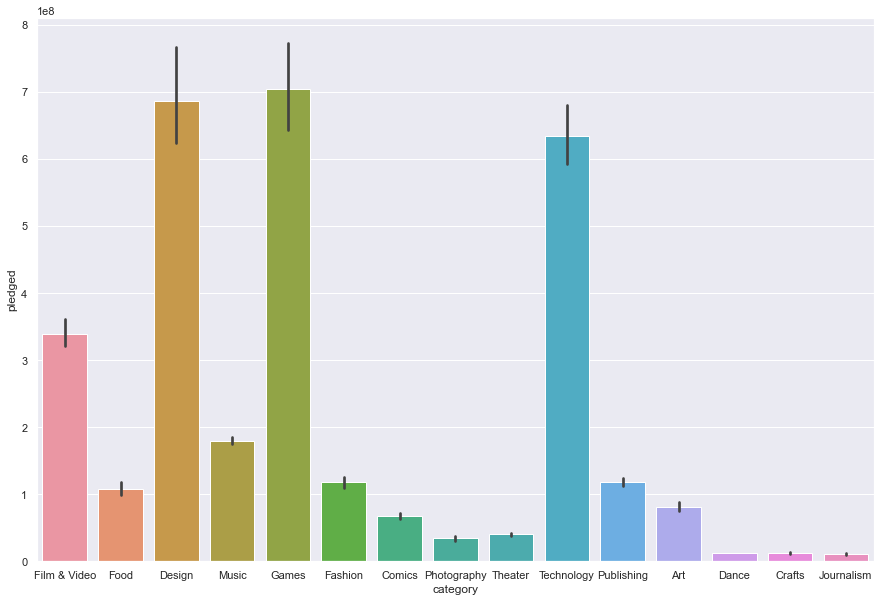

In [16]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.sum)
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
#https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

<AxesSubplot:xlabel='category', ylabel='pledged'>

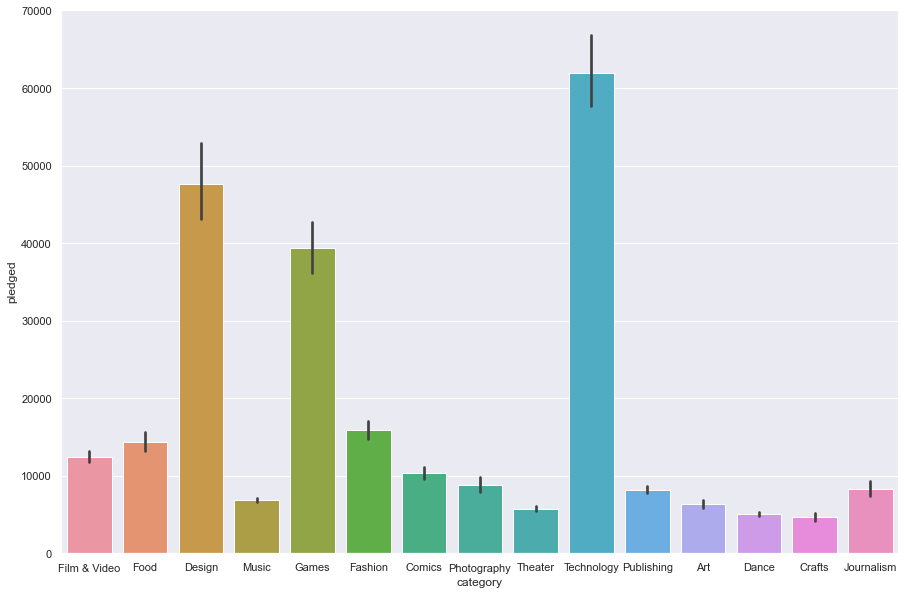

In [17]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.mean)

<AxesSubplot:xlabel='category', ylabel='plus_minus'>

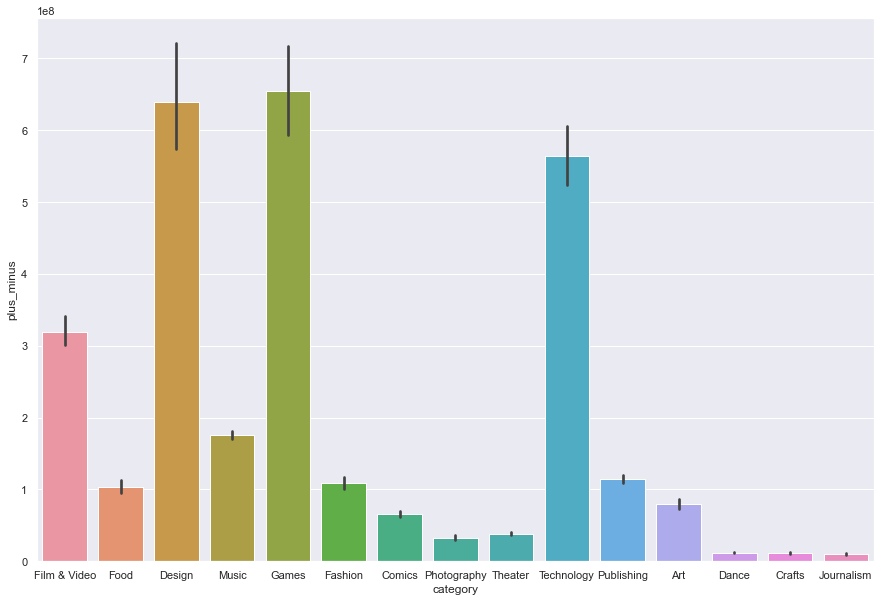

In [18]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='plus_minus',estimator=np.sum)

## Task 4 | Research Question Analysis | Jacob

#### Jacob's research question: Does the duration of a Kickstarter project affect its success?

---

One way to test this research question is to create a correlation matrix where the correlation between each pair of numeric variables in the dataset can be seen.

<AxesSubplot:>

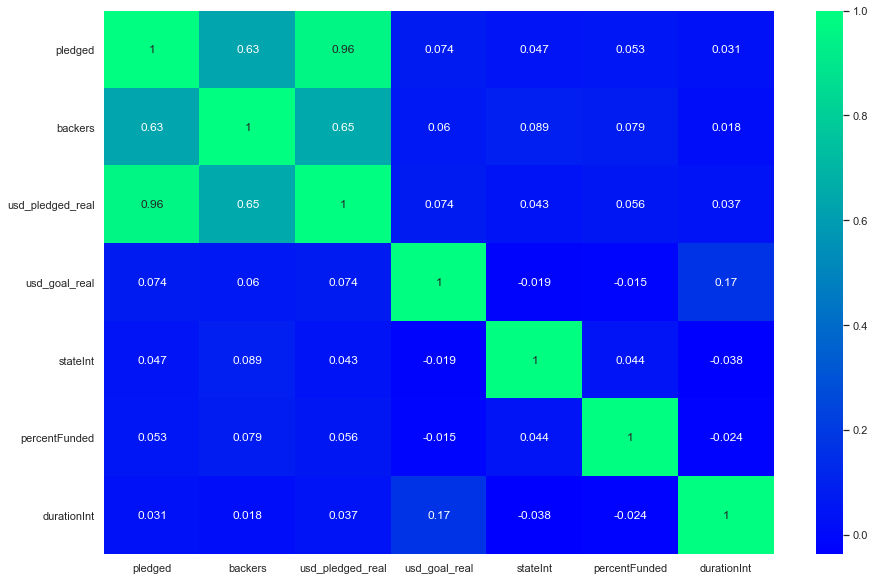

In [20]:
import seaborn as sns
corr = dfj.corr()
sns.heatmap(corr, annot=True, cmap='winter')

In this plot, I am interested in the correlation between how funded the project was (percentFunded) and the duration of the project (durationInt). Here it shows a correlation of -0.024 which is a strong first indicator that the duration of the Kickstarter project may not affect its success.

Here is another plot which helps show visually that duration of the project doesn't seem to be strongly correlated with the success of the project. Interestingly we can see that the amount of projects increases around 100%, but before 100% the amount of projects is not as many. I think this may be because once a project is close to being funded (80%-90%) it may be that more backers will fund the project to push it to reach 100% since it is so close.

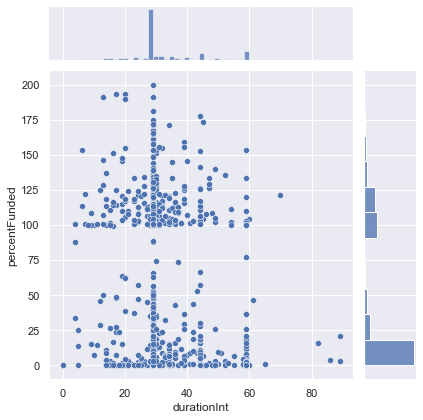

In [24]:
df2 = dfj[dfj['percentFunded'].between(0, 200)]
sns.jointplot(data=df2, x='durationInt', y='percentFunded')

Here is one of the main plots for this investigation. It shows the probability of success of the project versus how long the project's funding time was. It shows that there indeed is a variance in the success of projects based on how long they run. Interestingly, there are two main peaks for highest success. One ata around ~10 days and another at ~66 days.

<AxesSubplot:title={'center':'Probability of Success vs. Project Funding Time Length'}, xlabel='Duration of Project', ylabel='Probability of Success'>

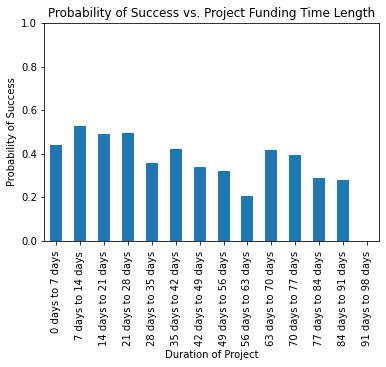

In [3]:
# Plot probability of success vs. project funding time length
df2 = project_functions.prepareDfForProbSuccessVSDuration(dfj)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot
df2.plot(kind='bar', x='formattedTimeIntervals', y='stateInt', ylabel='Probability of Success', xlabel='Duration of Project', ylim=(0,1), legend=False, title='Probability of Success vs. Project Funding Time Length')


Name                125
category             36
main_category        15
currency              1
deadline            103
launched            125
pledged             107
state                 3
backers              65
country               1
usd_pledged_real    107
usd_goal_real        56
stateInt              2
duration            125
percentFunded       108
durationInt           7
dtype: int64
mean: 0.416


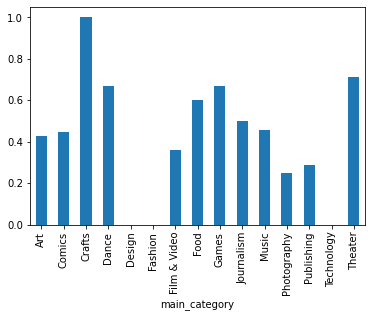

In [6]:
dfNew = project_functions.getProjectsWithDurationInTimeRange(dfj, 63, 70)
dfNew = project_functions.getProjectsAsFailedOrSuccessful(dfNew)
print(dfNew.nunique(axis=0))
print(f"mean: {dfNew['stateInt'].mean()}")
dfTest = dfNew.groupby('main_category')['stateInt'].mean().plot(kind='bar')

In [ ]:

dfNew2 = project_functions.getProjectsWithDurationInTimeRange(dfj, 7, 14)
dfNew2 = project_functions.getProjectsAsFailedOrSuccessful(dfNew2)
dfTest2 = dfNew2.groupby('main_category')['stateInt'].mean().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt


# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})

#print(df3.head(5))
df4 = df3.groupby([timeIntervals,'main_category']).mean()
df4 = df4[['stateInt']]
#print(df4.index.get_level_values(0))
df4['duration2'] = df4.index.get_level_values(0)
df4['category2'] = df4.index.get_level_values(1)
#print(df4.head(60))

df4 = df4[(df4['category2'] == 'Fashion') | (df4['category2'] == 'Music') | (df4['category2'] == 'Food') | (df4['category2'] == 'Journalism')]

print(df4.columns)
a = sns.barplot(data=df4, x='duration2', y='stateInt', hue='category2')
# for help rotating x_tick labels:
# https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')

#plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



Based on the inital correlation matrix, it seemed as though there wasn't a relationship between the project funding duration and the probability of the project's success. **However, after ploting the probability of success vs project duration there did seem to be a relationship, although non-linear**. Because the relationship is non-linear that may be why the correlation matrix did not show a relationship between the two variables. Based on the graphs, the project success peaks if it has a > 1 week < 4 week duration. This makes sense as if a project doesn't have too long to be funded it may incentivised a potential backer to back right away lessening the probability that they forget about the project. Also project success dips somewhat lower if it is < 1 week and this also makes sense. If a project only has a funding duration of 1 week less people are likely to be able to see it and the news of the project may not reach enough people.

The probability of success vs funding time curve also seemed to be a similar shape for most categories peaking at ~10 days and having a lowest point at ~60 days. Although the overall probability of success varied between categories, which can be seen by the curve being 'squashed' for lower probability categories and 'stretched' for higher probability categories.

## Task 4 | Research Question Analysis | Rylan

Rylan's research question: Which categories have the most successful dollar spent?